## Install and import packages

In [ ]:
%pip install -q ipywidgets
from ipywidgets import interactive, fixed, IntSlider, HBox, Layout, interact
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import cv2
import os
from PIL import Image
import tifffile as tiff

## Input the full path of your input image in `img_path` and output folder in `output_folder`

In [17]:
img_path = "/path/to/<sample_img>.png"   # Put your input file path here
output_folder = "/path/to/output/"       # Put the path to your desired output folder here

## Load the image

In [ ]:
s = os.path.splitext(img_path)
if s[-1] == ".tif":
  img = tiff.imread(img_path)
  image = np.array(img)
  image = image.astype("float32")
  image = ((image - np.min(image))/(np.max(image)-np.min(image)))*255.0
  x=Image.fromarray(image).convert("RGB")
  image = np.asarray(x)
if s[-1] == ".png":
  image = cv2.imread(img_path)
img = image

## Select a patch to analyse
- Use the sliders `x` and `y` to adjust the top-left corner of the square patch
- The maximum size of the square patch is limited to 1000x1000 pixels

In [ ]:
def get_top_left(img, x, y, size):
    if x + size > img.shape[1]:
        x = np.maximum(0,img.shape[1] - size)
    if y + size > img.shape[0]:
        y = np.maximum(0,img.shape[0] - size)

    return x, y

large_side = np.maximum(img.shape[0], img.shape[1])

size_o = np.minimum(np.minimum(np.minimum(large_side//10, 1000), img.shape[1]), img.shape[0])
scale = 0.1
size = size_o*scale
if scale != 1:
  img1 = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_NEAREST)
else:
  img1 = img
x_ticks = np.arange(0, img.shape[1], 5*int(int(1/scale)/scale))
y_ticks = np.arange(0, img.shape[0], int(int(int(1/scale)/scale)/scale))

def plot_box(x=200, y=200):
    x *= scale
    y *= scale
    x, y = get_top_left(img1, x, y, size)
    fig, ax = plt.subplots(figsize=(20,20))
    ax.imshow(img1)
    plt.setp(ax, xticks=np.arange(0, img1.shape[1], 50), xticklabels=x_ticks, yticks=np.arange(0, img1.shape[0], 100), yticklabels=y_ticks)
    ax.add_patch(patches.Rectangle((x, y), size, size, fill=False, edgecolor='red', lw=2))
y_slider = IntSlider(min = 0, max = img.shape[0], step=10)
x_slider = IntSlider(min = 0, max = img.shape[1], step=10)

interact(plot_box, x = x_slider, y = y_slider)

interactive(children=(IntSlider(value=0, description='x', max=3984, step=10), IntSlider(value=0, description='…

<function __main__.plot_box(x=200, y=200)>

## Retrieve the Patch

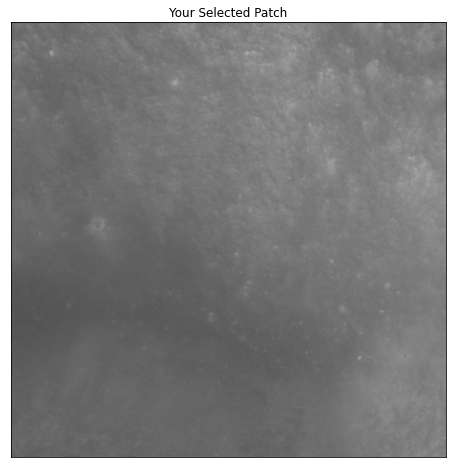

In [ ]:
y_f = y_slider.value
x_f = x_slider.value
x_f, y_f = get_top_left(img, x_f, y_f, size_o)
x1, x2 = x_f, x_f+size_o
y1, y2 = y_f, y_f+size_o
img_patch = np.copy(img[y1:y2, x1:x2])
img_patch = Image.fromarray(img_patch)
img_patch.save(f"{output_folder}/image_patch_orignal.png")
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_title("Your Selected Patch")
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax.imshow(np.array(img_patch))

## Prepare the Model

In [ ]:
!pip install -r requirements.txt
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r ./MSR_SWINIR/requirements.txt
!pip install -r ./ESRGAN/requirements.txt
!python ./ESRGAN/setup.py develop
!pip install -r ./HAT/requirements.txt
!python ./HAT/setup.py develop

## Run the Model

In [15]:
!python ./pipeline.py -i output_folder/image_patch_orignal.png -o output_folder/image_patch_sr.png sr --sr_model HAT --scale 4 --tile 256 sr --sr_model realesrgan --scale 4 --tile 256 int --scale 4 shp

python3: can't open file 'pipeline.py': [Errno 2] No such file or directory


## Final Images

In [ ]:
img_patch_sr = cv2.imread(f"output")
fig, ax = plt.subplots(1,2, figsize=(15,15))
ax[0].imshow(img_patch)
ax[0].set_title("Original Patch")
ax[1].imshow(img_patch_sr)
ax[1].set_title("SR Image")

**Higher Resolution Image:** `output_folder`/image_patch_sr.png
